### Steps:
### 1. Import libraries

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 

### 2. Import and read CSV file

In [3]:
col_names = ['Windy', 'AGQ', 'Hot', 'Play_Tennis']
data = pd.read_csv("decision.csv", header=None, names=col_names)

### 3. Convert Text values to numeric value

In [5]:
data.Air_Quality_Good[data.Air_Quality_Good == 'Yes'] = 1
data.Air_Quality_Good[data.Air_Quality_Good == 'No'] = 0
data.Windy[data.Windy == 'Yes'] = 1
data.Windy[data.Windy == 'No'] = 0
data.Hot[data.Hot == 'Yes'] = 1
data.Hot[data.Hot == 'No'] = 0
data.Play_Tennis[data.Play_Tennis == 'Yes'] = 1
data.Play_Tennis[data.Play_Tennis == 'No'] = 0
data.head()

,Windy,Air_Quality_Good,Hot,Play_Tennis
0,0,0,0,0
1,1,0,1,1
2,1,1,0,1
3,1,1,1,0


### 4. Define target variable and features

In [13]:
feature_cols = ['Windy','Hot','AGQ']
X = data[feature_cols] # Features
y = data.Play_Tennis # Target variable

### 5. Gini model

In [21]:
model = DecisionTreeClassifier()
print(model)
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


### 6. Draw the graph

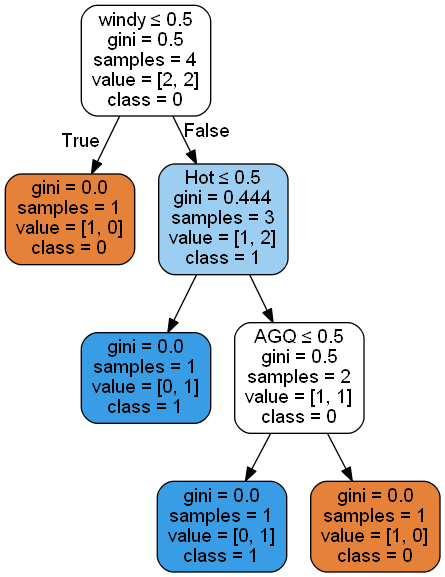

In [23]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decide.png')
Image(graph.create_png())

### 7. Entropy Model and Decision tree graph

In [26]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model.fit(X,y)

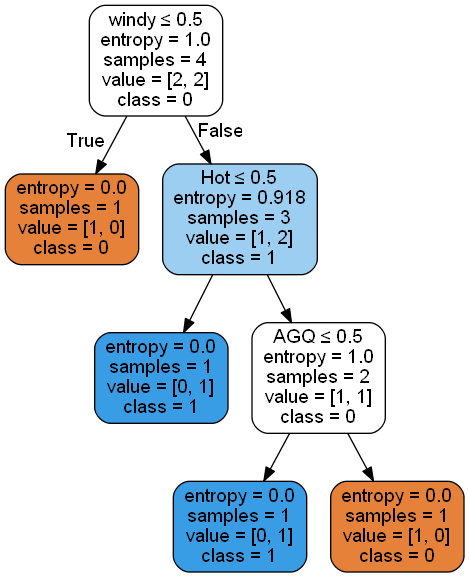

In [27]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decide.png')
Image(graph.create_png())